Collin Rinehart \newline
ASEN6010 Homework 1

# Problem 1
Solve 1.12 in S&J
<br><br>
\newline
See attached scanned in work for solution.

# Problem 2
You are given a 3 × 3 matrix and are asked to check if this is a proper rotation matrix.
Without checking $[C][C]^T = [I]$, name three checks that you could do to see if this is not a proper
orthogonal matrix.
<br><br> \newline
See attached scanned in work for solution.

# Problem 3
Develop the forward and backwards mapping between the CRPs and MRPs. Express your
answer in vectorial/matrix form.
<br><br> \newline
See attached scanned in work for solution.

# Problem 4
Write a subroutine to compute the relative orientation between two frame. The inputs
are 2 MRP sets, and the output should be a MRP set constrained to $|\sigma| \le 1$.

In [37]:
#Problem 4
import numpy as np

def mrp_subtraction(MRP3, MRP1):
    # Calculates the relative orientation between two frames expressed as 2 MRP sets, such that "mrp1 + mrp2 = mrp3"
    # Output is constrained to mag(sigma) < 1

    M1 = np.linalg.norm(MRP1)**2
    M3 = np.linalg.norm(MRP3)**2
    denom = (1 + (M1*M3) + np.dot(2*MRP1.T, MRP3))
    print("denom = ", denom)

    if abs(denom) < 0.1:    # This check is added to switch an MRP if the addition equation is near singular
        if M1 > M3:
            MRP1 = (-1/(mag(MRP1)**2)) * MRP1
        else:
            MRP3 = (-1/(mag(MRP3)**2)) * MRP3
    
    MRP2 = ((1-M1)*MRP3 - (1-M3)*MRP1 + 2*np.cross(MRP3, MRP1, axis=0)) / (1 + (M1*M3) + np.dot(2*MRP1.T, MRP3)) # This is singular if the denominator goes to zero.. (-3 pts in homework, the above check was added)

    if np.linalg.norm(MRP2) > 1:
        MRP2 = (-1/(np.linalg.norm(MRP2)**2)) * MRP2
    
    return MRP2

# Problem 5
Derive an expression for the total kinetic energy of a single rigid continuous body
(both translational and rotational) by starting with the general energy expression for a continuous blob
$T = (1/2)\int_B \dot{R}· \dot{R}  dm$. <br> 
The vector R is the inertial position vector of the differential mass element dm.
<br><br> \newline
See attached scanned in work for solution.

# Problem 6
Use model coordinates to discuss the stability of this linear system.

In [1]:
# Problem 6
import numpy as np
import math
 
E1 = -10
E2 = 5*math.sqrt(2)*(6 - 5*math.sqrt(3))
E3 = 5*math.sqrt(2)*(6 + 5*math.sqrt(3))
E4 = 5-20*math.sqrt(3)
E5 = 115
E6 = 5 + 20*math.sqrt(3)

A = (1/16)*np.array([[E1,E2,E3],[E2,E4,E5],[E3,E5,E6]])

eigs, phi = np.linalg.eig(A)
D = np.diag(eigs)
print ("Eigen Values:\n", eigs)
print("Phi Matrix:\n",phi)

Eigen Values:
 [-1.00000000e+01  1.28369537e-16  1.00000000e+01]
Phi Matrix:
 [[ 0.5         0.75        0.4330127 ]
 [ 0.61237244 -0.65973961  0.43559574]
 [-0.61237244 -0.04736717  0.78914913]]


## Problem 6 Discussion
When the modal (spectral) decomposition of the matrix A is taken, the eigen values and eigen vectors of the system are determined. As seen from the code above, the eigen values of the system are all strictly real, with values of -10, 0, and 10 respectively. This means that in the modal space, the system has one stable mode (eigen value:-10), one indefinite mode (eigen value: 0), and one unstable mode (eigen value: 10) each along the directions of the eigen vectors in the state space. Ultimately, this indicates that the system as a whole in the state space is an unstable system when no control is applied.

# Problem 7

For the following functions V, analyze if the definiteness of these functions, as well as if they are radially unbounded and/or decresent:

a.) $V(x_1, x_2) = sin^2(x_1 +x_2) + sin^2(x_1-x_2)$ 

This function is Positive Semi-Definite, radially bounded, and not decrescent. It is Positive Semi-Definite because this function is zero when both $x_1$ and $x_2$ are zero (origin) and oscillates periodically while remaining positive but equaling zero at locations that are not the origin. This function is radially bounded because it as ||x|| goes to infinity, V continues to oscillate between 0 and 1. The function is not decrescent because it is not a function of time.


b.) $V(x_1, x_2) = (x_1 +x_2^2)^2$

This function is Positive Semi-Definite, radially unbounded, and not decrescent. It is Positive Semi-Definite because this function is greater than zero everwhere except when $x_1$ = $-x_2^2$, which includes the origin. This function is radially unbounded because as ||x|| goes to infinity, the function V also blows up to infinity. The function is not decrescent because it is not a function of time.

c.) $V(x_1, x_2, t) = 1 + sin^2(t)(x_1^2 + x_2^2)$

This function is Positive Definite, radially unbounded, and decrescent. It is Positive Definite because this function is greater than zero everwhere except for the origin, as all of the individual terms are squared or added so V cannot reach zero after it has deviated from the origin. This function is radially unbounded because as ||x|| goes to infinity, the function V also blows up to infinity. The function is decrescent because its time variation can be bounded by the following two functions of x, per the definition of decrescent. <br>
Lower bound: $W(x_1, x_2) = (x_1^2 + x_2^2)$ <br>
Upper bound: $W(x_1, x_2) = 3*(x_1^2 + x_2^2)$ <br>

# Problem 8

## Part a) Determine all the equilibira of this system.

In [50]:
# solving (5-x)^5 = 0 for x
x_eq = 5 - 0**(1/5)
print("Equilibria of this system occur at x =",x_eq)

Equilibria of this system occur at x = 5.0


## Part b) Discuss the nonlinear stability of this system (stable?, asymptotic?, uniform?).

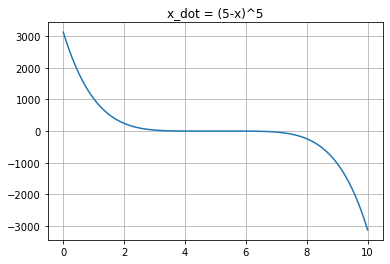

In [49]:
import matplotlib.pyplot as plt
x = np.linspace(0,10,100)

# Plotting the system dynamics
plt.figure()
plt.plot(x, (5-x)**5)
plt.title('x_dot = (5-x)^5')
plt.grid(True)

We will attempt to show that this system is stable using Lyapunov principles. <br> \newline
The following Lyapunov function is chosen: $V(x) = (5-x)^2$. <br> \newline
This function is a valid Lyapunov function as it is positive definite about the reference $x_r = 5$, it has continuous partial derivatives, and $\dot{V}(x)$ is at least negative semi definite.<br><br> \newline
We can then take the derivative of this Lyapunov function. <br> <br> \newline
$\dot{V}(x) = 2(5-x)(-\dot{x}) = -2(5-x)(\dot{x})$. <br><br> \newline
We can then substitute in our equation dynamics for $\dot{x}$. <br><br> \newline
$\dot{V}(x) = -2(5-x)(5-x)^5 = -2(5-x)^6$ <br><br> \newline
In the plots below, we can observe that V(x) is globally positive definite and $\dot{V}(x)$ is globally negative definite

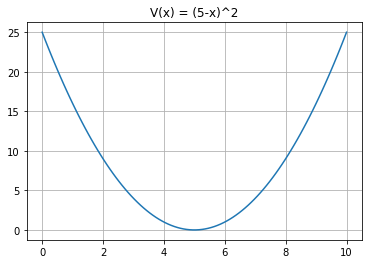

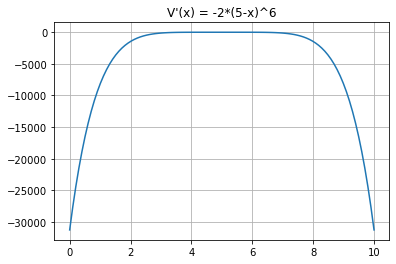

In [48]:
plt.figure()
plt.plot(x, (5-x)**2)
plt.grid(True)
plt.title('V(x) = (5-x)^2')

plt.figure()
plt.plot(x, -2*(5-x)**6)
plt.title("V'(x) = -2*(5-x)^6")
plt.grid(True)

We have shown that a valid Lyapunov function exists for this dynamical system and that V'(x) is at least negative semi-definite which indicates that the system is stable about the reference $x_r = 5$.<br>
Further, we have also shown that V'(x) is globally negative definite about the reference $x_r$, which proves that the system is globally asymptotically stable as well. <br>
This system is not uniformly stable as this descriptor only applies to non-autonomous (time dependent) system.<br> 

# Problem 9
Discuss the nonlinear stability of the system $\dot{x} = -(1 + g(t))x^3$ where $g(t) \ge 0$ for all t $\gt$ 0. <br><br>
We can look at the nonlinear stability of this system by using non-autonomous Lyapunov principles<BR>
The following Lyapunov function was chosen:<br>
$V(x) = 0.5x^2$ <br>
This function is positive definite, continuously differentiable, decrescent function where $W_1(x) \le V(x) \le W_2(x)$ where $W_1(x) = 0.25x^2$ and $W_2(x) = x^2$.<br><br>
We can then evaluate $\dot{V} = \delta V/\delta t + (\delta V/\delta x)f(x,t)$ <br><br>

$\dot{V}(x) = 0+x\dot{x} = x(-(1+g(t))x^3) = -(1+g(t))x^4$<br><br>

Below is a plot of V_dot(x) = -x^4/(1+g(t)) to show that the function is negative definite. Because g(t) > 0 for all t, both the real v_dot and the scaled v_dot presented below are both negative definite.<br>
With $\dot{V}(x)$ shown to be less than or equal to zero, this system is shown to be uniformly stable. We know g(t) > 0 for all t > 0 but without further information on g(t), we cannot definitively show Uniform Asymptotic Stability.

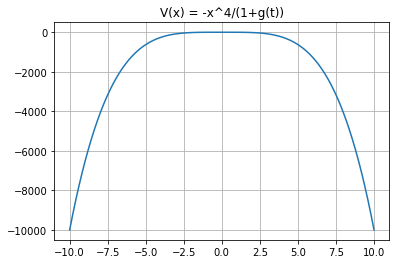

In [47]:
x2 = np.linspace(-10,10,100)
plt.figure()
plt.plot(x2, -x2**4)
plt.title('V(x) = -x^4/(1+g(t))')
plt.grid(True)

# Problem 10
Derive and show all the details of a MRP-based attitude tracking feedback control law. Use Lyapunov theory to analytically discuss stability.
<br><br>
See the attached scanned in work for derivation.

# Problem 11
Write a program to numerically simulate the orientational motion of a single rigid body. Use Euler Parameters as the body frame attitude coordinates relative to the inertial frame of the simulation. Apply your MRP-based feedback control to this rigid body and illustrate how you can track a time varying reference trajectory.

The program below runs a numerical simulation in which a rigid body spacecraft body begins at some initial attitude and rate and begins tracking a time varying reference trajectory. The body slews to converge on the reference trajectory and the attitude error is seen to approach the zero-rotation quaternion and the rates approach a constant value, as the reference trajectory is represented as a time varying Hill frame with constant angular velocity. The control law is MRP-based as was derived in problem 10, while quaternions are used in the remainder of the simulation. This simulation yields good results and illustrates the control law's ability to track a time varying reference trajectory. 

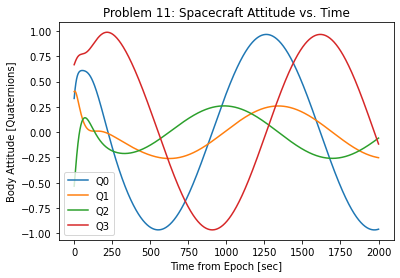

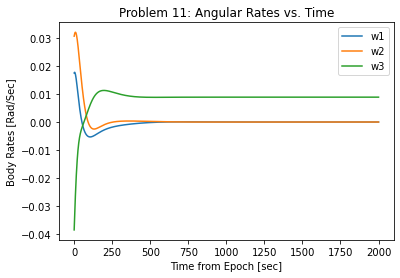

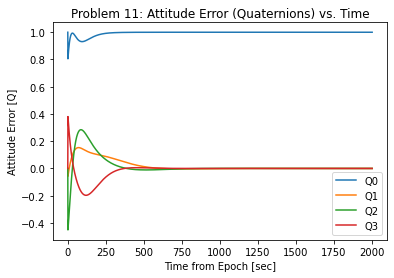

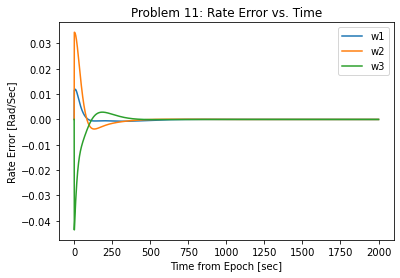

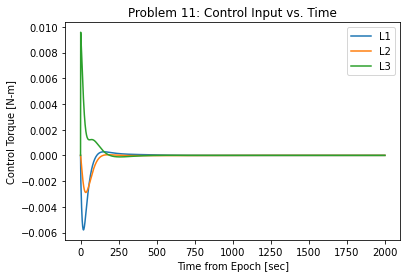

In [10]:
# Problem 11
import math
import matplotlib.pyplot as plt
def tilde(vec):
    #  Uses Numpy Matrix column vectors to define a tilde matrix
    #  Returns a Numpy matrix
    vec_tilde = np.matrix([[0, -vec.A1[2], vec.A1[1]],
                           [vec.A1[2], 0, -vec.A1[0]],
                           [-vec.A1[1], vec.A1[0], 0]])
    return vec_tilde

def mag(a):
    # Calculates the Euclidean Norm (i.e. magnitude) of a vector
    return np.linalg.norm(a)

def DCM_to_Quaternion(DCM):
    # Calculates quaternions from a DCM using Shepard's Method
    B0_sqrd = 0.25 * (1 + np.trace(DCM))
    B1_sqrd = 0.25 * (1 + 2 * DCM[0, 0] - np.trace(DCM))
    B2_sqrd = 0.25 * (1 + 2 * DCM[1, 1] - np.trace(DCM))
    B3_sqrd = 0.25 * (1 + 2 * DCM[2, 2] - np.trace(DCM))
    B = [B0_sqrd, B1_sqrd, B2_sqrd, B3_sqrd]

    if max(B) == B0_sqrd:
        B0 = math.sqrt(B0_sqrd)
        B1 = (DCM[1, 2] - DCM[2, 1])/(4*B0)
        B2 = (DCM[2, 0] - DCM[0, 2]) / (4 * B0)
        B3 = (DCM[0, 1] - DCM[1, 0]) / (4 * B0)

    elif max(B) == B1_sqrd:
        B1 = math.sqrt(B1_sqrd)
        B0 = (DCM[1, 2] - DCM[2, 1])/(4*B1)
        B2 = (DCM[0, 1] + DCM[1, 0]) / (4 * B1)
        B3 = (DCM[2, 0] + DCM[0, 2]) / (4 * B1)

    elif max(B) == B2_sqrd:
        B2 = math.sqrt(B2_sqrd)
        B0 = (DCM[2, 0] - DCM[0, 2]) / (4 * B2)
        B1 = (DCM[0, 1] + DCM[1, 0]) / (4 * B2)
        B3 = (DCM[1, 2] + DCM[2, 1]) / (4 * B2)

    elif max(B) == B3_sqrd:
        B3 = math.sqrt(B3_sqrd)
        B0 = (DCM[0, 1] - DCM[1, 0]) / (4 * B3)
        B1 = (DCM[2, 0] + DCM[0, 2]) / (4 * B3)
        B2 = (DCM[1, 2] + DCM[2, 1]) / (4 * B3)

    Q = np.matrix([[B0], [B1], [B2], [B3]])
    Q = Q/mag(Q)
    return Q

def Quaternion_to_DCM(Q):
    B0 = Q.A1[0]
    B1 = Q.A1[1]
    B2 = Q.A1[2]
    B3 = Q.A1[3]

    DCM11 = B0**2 + B1**2 - B2**2 - B3**2
    DCM12 = 2*(B1*B2 + B0*B3)
    DCM13 = 2*(B1*B3 - B0*B2)

    DCM21 = 2*(B1*B2 - B0*B3)
    DCM22 = B0**2 - B1**2 + B2**2 - B3**2
    DCM23 = 2*(B2*B3 + B0*B1)

    DCM31 = 2*(B1*B3 + B0*B2)
    DCM32 = 2*(B2*B3 - B0*B1)
    DCM33 = B0**2 - B1**2 - B2**2 + B3**2

    DCM = np.matrix([[DCM11, DCM12, DCM13], 
                    [DCM21, DCM22, DCM23], 
                    [DCM31, DCM32, DCM33]])

    return DCM

def DCM2MRP(DCM):
    # Calculates MRPs from a DCM. DCM must be a 3x3 numpy matrix
    Q = DCM_to_Quaternion(DCM)
    sigma1 = Q.A1[1]/(1 + Q.A1[0])
    sigma2 = Q.A1[2]/(1 + Q.A1[0])
    sigma3 = Q.A1[3]/(1 + Q.A1[0])
    sigma = check_for_shadow_set(np.matrix([[sigma1], [sigma2], [sigma3]]))
    return sigma

def MRP2DCM(sigma):
    # Calculates a DCM from an MRP set. sigma must be a numpy matrix column vector
    DCM = np.identity(3) + (1/(1 + mag(sigma)**2)**2) * (8*tilde(sigma)**2 - 4*(1-mag(sigma)**2)*tilde(sigma))
    return DCM

def Quaternion_to_MRP(Q):
    B0 = Q.A1[0]
    B1 = Q.A1[1]
    B2 = Q.A1[2]
    B3 = Q.A1[3]

    s1 = B1/(1+B0)
    s2 = B2/(1+B0)
    s3 = B3/(1+B0)

    MRP = np.matrix([[s1],[s2],[s3]])
    return MRP

def MRP_to_Quaternion(MRP):
    sigma_2 = np.linalg.norm(MRP)**2
    B0 = (1 - sigma_2)/(1 + sigma_2)
    B1 = 2*MRP.A1[0]/(1 + sigma_2)
    B2 = 2*MRP.A1[1]/(1 + sigma_2)
    B3 = 2*MRP.A1[2]/(1 + sigma_2)

    Q = np.matrix([[B0],[B1],[B2],[B3]])
    return Q

def check_for_shadow_set(MRP):
    # Checks if the MRPs should be switched to the shadow set. If not, it returns itself
    if mag(MRP) > 1:
        shadowset = (-1/(mag(MRP)**2)) * MRP
        return shadowset
    else:
        return MRP

def attitude_error(t, sigma_BN, b_w_BN, RN, wRN):
    # Calculates the attitude error and rate error based on current states and current reference
    BN = MRP2DCM(sigma_BN)
    BR = BN * RN.T
    wRN = wRN
    sigma_BR = DCM2MRP(BR)  # calculates the attitude error
    b_wBR = b_w_BN - BN*wRN  # calculates rate error in body frame
    return sigma_BR, b_wBR

def generate_reference(t):
    # Calculates the 'Inertial-to-Hill Frame' DCM as a reference trajectory
    RAAN_LMO = math.radians(20)
    i_LMO = math.radians(30)
    theta_dot_LMO = 10 * 0.000884797  # [rad/s]
    theta_LMO = math.radians(60) + theta_dot_LMO * t

    HN = np.matrix([[math.cos(RAAN_LMO)*math.cos(theta_LMO)-math.sin(RAAN_LMO)*math.cos(i_LMO)*math.sin(theta_LMO),
                        math.sin(RAAN_LMO) * math.cos(theta_LMO) + math.cos(RAAN_LMO) * math.cos(i_LMO) * math.sin(theta_LMO),
                        math.sin(i_LMO)*math.sin(theta_LMO)],
                    [-math.cos(RAAN_LMO)*math.sin(theta_LMO) - math.sin(RAAN_LMO)*math.cos(i_LMO)*math.cos(theta_LMO),
                        -math.sin(RAAN_LMO) * math.sin(theta_LMO) + math.cos(RAAN_LMO) * math.cos(i_LMO) * math.cos(theta_LMO),
                        math.sin(i_LMO)*math.cos(theta_LMO)],
                    [math.sin(RAAN_LMO)*math.sin(i_LMO), -math.cos(RAAN_LMO) * math.sin(i_LMO), math.cos(i_LMO)]])

    H_w_HN = np.matrix([[0], [0], [theta_dot_LMO]]) # expressed in reference frame components
    w_HN = HN.T*H_w_HN
    w_HN_dot = np.matrix([[0], [0], [0]]) # assumes circular orbit
    return HN, w_HN, w_HN_dot

def evaluate_control_reference(time, Q_BN, wBN, inertia, control_reference=None):
    # Control Gains
    K = 1 * 0.00555555555  # [Nm]
    P = 1 * 0.1666666666  # [units]

    I = inertia

    RN, w_RN, w_RN_dot = generate_reference(time)
    sigmaBN = Quaternion_to_MRP(Q_BN)
    b_w_RN = Quaternion_to_DCM(Q_BN)*w_RN

    # Evaluate which control reference to use at the current time step
    sigmaBR, wBR = attitude_error(time, sigmaBN, wBN, RN, w_RN)
    u = -K * sigmaBR - P * wBR + I*(w_RN_dot - tilde(wBN)*b_w_RN) + tilde(b_w_RN)*I*wBN
    Q_BR = MRP_to_Quaternion(sigmaBR)

    return u, Q_BR, wBR

def ODE(state_vector, control_vector, inertia):
    # Ordinary differential equations for MRPs and omegas for our system/spacecraft
    I = inertia
    Q = state_vector[0:4]
    w = state_vector[4:]
    u = control_vector

    # Quaternion Kinematic Differential Equations
    q_dot = 0.5*np.matrix([[0,-w.A1[0],-w.A1[1],-w.A1[2]],
                             [w.A1[0],0,w.A1[2],-w.A1[1]],
                             [w.A1[1],-w.A1[2],0,w.A1[0]],
                             [w.A1[2],w.A1[1],-w.A1[0],0]]) @ Q

    # Angular Rate Kinematic Differential Equations
    w1_dot = -((I[2, 2] - I[1, 1]) / I[0, 0]) * w.A1[1] * w.A1[2] + (u.A1[0]/I[0, 0])
    w2_dot = -((I[0, 0] - I[2, 2]) / I[1, 1]) * w.A1[2] * w.A1[0] + (u.A1[1]/I[1, 1])
    w3_dot = -((I[1, 1] - I[0, 0]) / I[2, 2]) * w.A1[0] * w.A1[1] + (u.A1[2]/I[2, 2])
    w_dot = np.matrix([[w1_dot], [w2_dot], [w3_dot]])

    state_dot = np.concatenate((q_dot, w_dot), axis=0)
    return state_dot

def integrate(initial_state, time, control_reference=None):
    # Setup initial values/lists to build on
    int_time = np.linspace(0, time, time+1)
    state = [initial_state]
    #state_Q = [initial_state[:4]]
    att_err_Q = [np.matrix([[1], [0], [0], [0]])]
    rate_err = [np.matrix([[0], [0], [0]])]
    control = [np.matrix([[0], [0], [0]])]
    I = np.matrix([[10, 0, 0],
                [0, 5, 0],
                [0, 0, 7.5]])

    # Perform Runge-Kutta 4th Order Integration for specified time
    for t in range(time):
        Q_BN = state[t][:4]
        wBN = state[t][4:]
        u, Q_BR, wBR = evaluate_control_reference(t, Q_BN, wBN, I, control_reference)

        k1 = ODE(state[t], u, I)
        k2 = ODE(state[t] + 0.5*k1, u, I)
        k3 = ODE(state[t] + 0.5*k2, u, I)
        k4 = ODE(state[t] + k3, u, I)
        new_state_Q = state[t] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

        # Save results from current time step
        state.append(new_state_Q)
        att_err_Q.append(Q_BR)
        rate_err.append(wBR)
        control.append(u)

    return int_time, state, att_err_Q, rate_err, control

def plot_data(data, title):
    t = data[0]

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[1]])
    plt.plot(t, [item.A1[1] for item in data[1]])
    plt.plot(t, [item.A1[2] for item in data[1]])
    plt.plot(t, [item.A1[3] for item in data[1]])
    plt.title(title + ": Spacecraft Attitude vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Body Attitude [Quaternions]')
    plt.legend(['Q0', 'Q1', 'Q2', 'Q3'])

    plt.figure()
    plt.plot(t, [item.A1[4] for item in data[1]])
    plt.plot(t, [item.A1[5] for item in data[1]])
    plt.plot(t, [item.A1[6] for item in data[1]])
    plt.title(title + ': Angular Rates vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Body Rates [Rad/Sec]')
    plt.legend(['w1', 'w2', 'w3', '0'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[2]])
    plt.plot(t, [item.A1[1] for item in data[2]])
    plt.plot(t, [item.A1[2] for item in data[2]])
    plt.plot(t, [item.A1[3] for item in data[2]])
    plt.title(title + ': Attitude Error (Quaternions) vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Attitude Error [Q]')
    plt.legend(['Q0', 'Q1', 'Q2', 'Q3'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[3]])
    plt.plot(t, [item.A1[1] for item in data[3]])
    plt.plot(t, [item.A1[2] for item in data[3]])
    plt.title(title + ': Rate Error vs. Time')
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Rate Error [Rad/Sec]')
    plt.legend(['w1', 'w2', 'w3', '0'])

    plt.figure()
    plt.plot(t, [item.A1[0] for item in data[4]])
    plt.plot(t, [item.A1[1] for item in data[4]])
    plt.plot(t, [item.A1[2] for item in data[4]])
    plt.title(title + ": Control Input vs. Time")
    plt.xlabel('Time from Epoch [sec]')
    plt.ylabel('Control Torque [N-m]')
    plt.legend(['L1', 'L2', 'L3'])

# Run simulation
q0 = np.matrix([[0.33333333],[ 0.4],[-0.53333333], [0.66666667]]) #initial attitude quaternions
w0_BN = (math.pi / 180) * np.matrix([[1.0], [1.75], [-2.20]])  # Initial angular velocity in deg/s, expressed in body frame and converted to rad/s
initial_state = np.concatenate((q0, w0_BN), axis=0)  # initial state vector (quaternions and rad/s)

t = 2000 # Simulation length in seconds
sim = integrate(initial_state, t)
plot_data(sim, 'Problem 11')

In [39]:
import numpy as np
Q1 = np.matrix([[0.0288555], [0.0288555], [0.0288555], [0.9987503]])
Q3 = np.matrix([[0.0814757], [0.0814757], [0.0814757], [-0.9899925]])

sigma1 = Quaternion_to_MRP(Q1)
sigma3 = Quaternion_to_MRP(Q3)

sigma2 = mrp_subtraction(sigma1,sigma3)
print(sigma2)

denom =  [[0.03288954]]
[[ 0.05459099]
 [-0.05932647]
 [-0.02818885]]
